# Output analysis

In [1]:
# Importing external packages

import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from pandas.plotting import parallel_coordinates
from matplotlib.lines import Line2D
from tqdm import tqdm

In [2]:
# # Importing model scripts, by first adding the main folder path

# module_path = os.path.abspath(os.path.join(".."))
# if module_path not in sys.path:
#     sys.path.append(module_path)

# from model.model_nile import ModelNile
# from experimentation.data_generation import generate_input_data
# import plotter

In [3]:
# Change the font type of matplotlib figures to make it match with the report

import matplotlib
import matplotlib.font_manager as fm

# sns.set(font_scale=1.2)

fm.fontManager.addfont("Minion Pro Regular.ttf")
matplotlib.rc("font", family="Minion Pro")

from matplotlib import rcParams

rcParams["font.family"] = "Minion Pro"
rcParams["font.sans-serif"] = "Minion Pro"
rcParams["font.size"] = 12

Read the results of the optimization:

In [4]:
# Define the subfoldername of the experiment of interest
subfoldername = "nfe5000_gini"
subfolderpath = f"../outputs/{subfoldername}"  

In [5]:

opt_results = pd.read_csv(f"{subfolderpath}/baseline_results_{subfoldername}.csv").drop(columns="Unnamed: 0")
opt_results

,v0,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v161,v162,v163,egypt_irr,egypt_90,egypt_low_had,sudan_irr,sudan_90,ethiopia_hydro,principle_result
0,0.153150,0.120177,0.562174,0.245114,-0.165570,0.048345,0.866991,0.486565,-0.127383,0.522068,...,0.632262,0.795613,0.891455,9.318004,2.672591,0.000000,7.636768,1.496776,12.659820,0.508261
1,0.083321,0.435864,0.086803,0.289718,-0.046804,0.206364,-0.116149,0.584802,-0.095820,0.137916,...,0.364745,0.619185,0.640859,9.496274,2.732896,0.000000,8.424333,1.662305,14.733976,0.501323
2,0.011414,0.887590,0.234652,0.222793,-0.790928,0.452266,-0.343934,0.226575,0.451220,0.064276,...,0.073323,0.484241,0.791037,10.887779,2.675792,0.000000,8.699732,1.706105,15.118389,0.500448
3,0.190388,0.003307,0.300802,0.320025,-0.508660,0.063393,-0.267097,0.699670,-0.850204,0.522512,...,0.851467,0.259093,0.438976,7.909469,2.243587,0.000000,7.660719,1.465703,12.003565,0.505960
4,0.151387,0.125475,0.125361,0.059499,0.036707,0.705182,0.524686,0.347013,0.450511,0.836309,...,0.930877,0.992722,0.900361,9.917207,2.711345,0.000000,7.593803,1.493755,12.740977,0.507540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,0.430464,0.735352,0.754527,0.408184,-0.331267,0.141363,0.160125,0.779146,0.349313,0.995816,...,0.814125,0.586391,0.711440,4.100523,1.513025,0.225000,9.186706,1.627796,10.797375,0.166749
347,0.430464,0.473388,0.754527,0.411100,-0.331267,0.092484,0.158818,0.412299,0.349313,0.897736,...,0.814125,0.598379,0.711440,4.533576,1.569193,0.395833,8.832312,1.563421,10.705488,0.166714
348,0.033928,0.013301,0.948768,0.222099,0.887850,0.053378,-0.696084,0.438356,-0.094721,0.616177,...,0.207052,0.229538,0.316459,12.650270,3.289931,0.000000,8.657225,1.431623,15.055125,0.503965
349,0.581761,0.743670,0.754393,0.396395,0.563543,0.142753,0.793179,0.214738,-0.166460,0.998243,...,0.901134,0.734791,0.919874,4.736391,1.734048,0.000000,9.242169,1.608378,7.263359,0.496996


Let's split the policy and objective value dataframes:

In [6]:
policies, objectives = opt_results.iloc[:, :-7], opt_results.iloc[:, -7:]

In [7]:
objectives.describe()

,egypt_irr,egypt_90,egypt_low_had,sudan_irr,sudan_90,ethiopia_hydro,principle_result
count,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000
mean,6.510704,2.041653,0.203490,8.731492,1.596572,11.773395,0.294789
std,2.942439,0.611289,0.234065,1.521801,0.152347,3.643842,0.162460
min,3.596671,1.239110,0.000000,5.527805,1.259674,2.208836,0.166691
25%,4.408593,1.594668,0.000000,7.648743,1.467876,10.754605,0.166720
50%,5.195466,1.795933,0.120833,8.816031,1.599628,12.568641,0.166810
75%,7.760025,2.335881,0.362500,9.862519,1.701976,14.869079,0.501052
max,16.381157,3.835463,0.829167,11.778624,1.927701,15.127814,0.539419


Query the policies which yield best performance with respect to each objective:

In [8]:
best_obj_indices = dict()
directions = ["min", "min", "min", "min", "min", "max", "max"]


for i, obj in enumerate(objectives):
    if directions[i] == "min":
        indexes = objectives.loc[objectives[obj] == objectives[obj].min(), :].index
    elif directions[i] == "max":
        indexes = objectives.loc[objectives[obj] == objectives[obj].max(), :].index
    else:
        print("issue with directions!")

    best_obj_indices[obj] = indexes


In [9]:
def get_best_obj_indices(objectives, directions):
    """
    Get the indices of the best (min or max) values for each objective.

    Parameters:
        objectives (DataFrame): The DataFrame containing the data.
        directions (list): The list of optimization directions ('min' or 'max')
                           corresponding to each objective.

    Returns:
        dict: A dictionary containing the objective names as keys and their
              corresponding best value indices as values.
    """
    best_obj_indices = {}

    for i, obj in enumerate(objectives):
        if directions[i] == "min":
            indexes = objectives.loc[objectives[obj] == objectives[obj].min(), :].index
        elif directions[i] == "max":
            indexes = objectives.loc[objectives[obj] == objectives[obj].max(), :].index
        else:
            print("Issue with directions! Supported directions: 'min' or 'max'.")
            return None

        best_obj_indices[obj] = indexes

    return best_obj_indices

In [10]:
directions = ["min", "min", "min", "min", "min", "max", "max"]
best_obj_indices = get_best_obj_indices(objectives, directions)
best_obj_indices

{'egypt_irr': Int64Index([125], dtype='int64'),
 'egypt_90': Int64Index([201], dtype='int64'),
 'egypt_low_had': Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,  10,
             ...
             324, 331, 333, 335, 336, 339, 345, 348, 349, 350],
            dtype='int64', length=135),
 'sudan_irr': Int64Index([186], dtype='int64'),
 'sudan_90': Int64Index([186], dtype='int64'),
 'ethiopia_hydro': Int64Index([350], dtype='int64'),
 'principle_result': Int64Index([100], dtype='int64')}

In [11]:
best_obj_indices['sudan_irr']

Int64Index([186], dtype='int64')

In [12]:
def create_global_variables(best_obj_indices, policies):
    """
    Create individual variables dynamically using a loop.

    Parameters:
        best_obj_indices (dict): A dictionary containing the objective names as keys and their
                                 corresponding best value indices as values.
        policies (DataFrame): The DataFrame containing the data.

    Returns:
        list: A list of the names of the created global variables.
    """
    created_global_variable_names = []
    created_global_variables = []
    merged_keys_dict = {}

    for obj_name, obj_indices in best_obj_indices.items():
        value = tuple(obj_indices)
        if value in merged_keys_dict:
            merged_keys_dict[value].append(obj_name)
        else:
            merged_keys_dict[value] = [obj_name]

    for value, obj_names in merged_keys_dict.items():
        # Check if the indices are unique for the merged keys
        if len(obj_names) == 1:
            obj_name = obj_names[0]
            global_variable_name = f"best_{obj_name}"
            globals()[global_variable_name] = best_obj_indices[obj_name]
            created_global_variable_names.append(global_variable_name)
            created_global_variables.append(globals()[global_variable_name])
        else:
            # If the indices are not unique, merge the key strings
            merged_key_string = "_".join(obj_names)
            global_variable_name = f"best_{merged_key_string}"
            globals()[global_variable_name] = value
            created_global_variable_names.append(global_variable_name)
            created_global_variables.append(globals()[global_variable_name])

    return created_global_variable_names, created_global_variables

# Call the function to create the global variables
created_vars_names, created_vars = create_global_variables(best_obj_indices, policies)

In [13]:
print(created_vars_names)
print(created_vars)

['best_egypt_irr', 'best_egypt_90', 'best_egypt_low_had', 'best_sudan_irr_sudan_90', 'best_ethiopia_hydro', 'best_principle_result']
[Int64Index([125], dtype='int64'), Int64Index([201], dtype='int64'), Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,  10,
            ...
            324, 331, 333, 335, 336, 339, 345, 348, 349, 350],
           dtype='int64', length=135), (186,), Int64Index([350], dtype='int64'), Int64Index([100], dtype='int64')]


In [14]:
objectives

,egypt_irr,egypt_90,egypt_low_had,sudan_irr,sudan_90,ethiopia_hydro,principle_result
0,9.318004,2.672591,0.000000,7.636768,1.496776,12.659820,0.508261
1,9.496274,2.732896,0.000000,8.424333,1.662305,14.733976,0.501323
2,10.887779,2.675792,0.000000,8.699732,1.706105,15.118389,0.500448
3,7.909469,2.243587,0.000000,7.660719,1.465703,12.003565,0.505960
4,9.917207,2.711345,0.000000,7.593803,1.493755,12.740977,0.507540
...,...,...,...,...,...,...,...
346,4.100523,1.513025,0.225000,9.186706,1.627796,10.797375,0.166749
347,4.533576,1.569193,0.395833,8.832312,1.563421,10.705488,0.166714
348,12.650270,3.289931,0.000000,8.657225,1.431623,15.055125,0.503965
349,4.736391,1.734048,0.000000,9.242169,1.608378,7.263359,0.496996


Before redoing the simulation with found policies, let's do some objectives visualization:

## Parallel Coordinates Plot

In [15]:
from pandas.plotting import parallel_coordinates
from matplotlib.lines import Line2D
import pandas as pd
import itertools
from collections import defaultdict

['best_egypt_low_had' 'All Solutions' 'best_principle_result'
 'best_egypt_irr' 'best_sudan_irr_sudan_90' 'best_egypt_90'
 'best_ethiopia_hydro']


I'm here


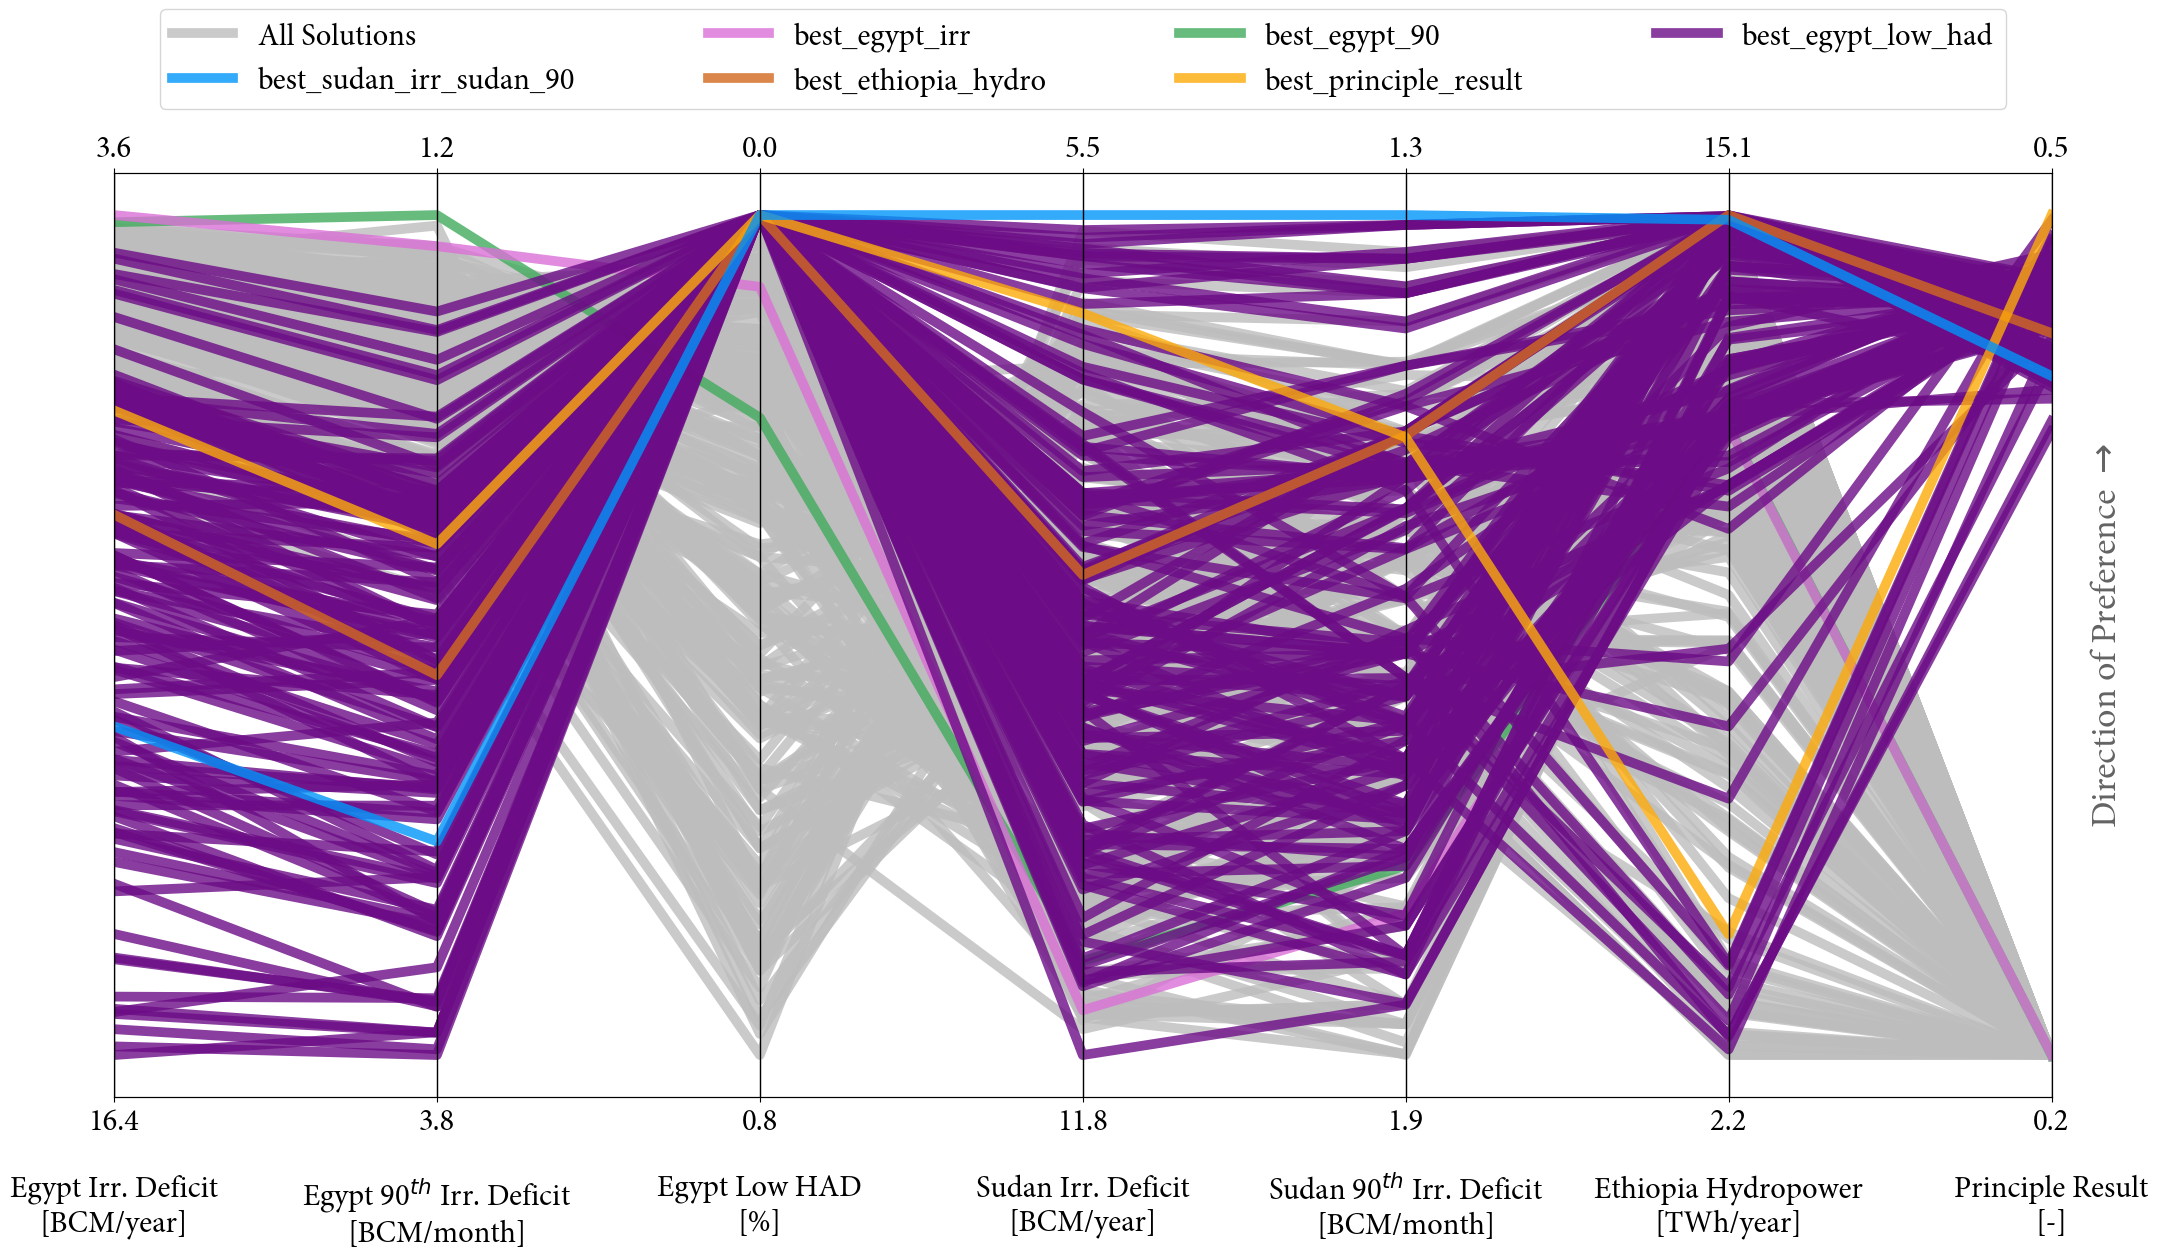

In [16]:
from plotter import parallel_plots_many_policies

parallel_plots_many_policies(
    objectives,
    created_vars,
    created_vars_names,
        names_display=[
        "Egypt Irr. Deficit",
        "Egypt 90$^{th}$ Irr. Deficit",
        "Egypt Low HAD",
        "Sudan Irr. Deficit",
        "Sudan 90$^{th}$ Irr. Deficit",
        "Ethiopia Hydropower",
        "Principle Result"
    ],
    units=["BCM/year", "BCM/month", "%", "BCM/year", "BCM/month", "TWh/year", "-"],
    directions=["min", "min", "min", "min", "min", "max", "max"],
)
plt.show()

In [17]:
def normalize_objs(df, directions):
    desirability_couples = list()
    working_df = df.copy()
    for i, col in enumerate(df.columns):
        if directions[i] == "min":
            best, worst = df[col].min(), df[col].max()
        elif directions[i] == "max":
            best, worst = df[col].max(), df[col].min()
        desirability_couples.append((worst, best))
        working_df[col] = (df[col] - worst) / (best - worst)

    return working_df, desirability_couples

Objective values are normalised such that the most desirable value becomes 1 whilst the least desirable becomes 0. On top of the normalised objectives dataframe, we can find some compromise solutions and include them into the color-coded policy set.

In [18]:
norm_df, desire_couples = normalize_objs(
    objectives, ["min", "min", "min", "min", "min", "max", "max"]
)

In [19]:
# def find_percentile_compromise_solutions(objectives_norm_df, percentile):
#     # Given a threshold percentage and normalised objectives data frame,
#     # returns the indices which performs above the threshold percentage
#     # for all objectives
#     index_lists = []
#     for col in objectives_norm_df.columns:
#         threshold = np.percentile(objectives_norm_df[col], percentile)
#         index_lists.append(
#             objectives_norm_df.loc[objectives_norm_df[col] >= threshold, :].index
#         )

#     common_indices = []
#     for i in objectives_norm_df.index:
#         counter = 0
#         for check_list in index_lists:
#             if i not in check_list:
#                 break
#             counter += 1
#         if counter == len(index_lists):
#             common_indices.append(i)

#     return common_indices

In [20]:
# def find_threshold_compromise_solutions(objectives_norm_df, threshold):
#     # Given a threshold value [0-1] and normalised objectives data frame,
#     # returns the indices which performs above the threshold value
#     # for all objectives
#     index_lists = []
#     for col in objectives_norm_df.columns:
#         index_lists.append(
#             objectives_norm_df.loc[objectives_norm_df[col] >= threshold, :].index
#         )

#     common_indices = []
#     for i in objectives_norm_df.index:
#         counter = 0
#         for check_list in index_lists:
#             if i not in check_list:
#                 break
#             counter += 1
#         if counter == len(index_lists):
#             common_indices.append(i)

#     return common_indices

In [21]:
find_percentile_compromise_solutions(norm_df, 45)

NameError: name 'find_percentile_compromise_solutions' is not defined

In [ ]:
find_threshold_compromise_solutions(norm_df, 0.82)

NameError: name 'find_threshold_compromise_solutions' is not defined

Now, we can add two more solutions into the policy set for further analysis:

In [ ]:
import importlib

importlib.reload(plotter)

solution_indices = created_vars
solution_names = created_vars_names

plotter.parallel_plots_many_policies(
    objectives,
    solution_indices=solution_indices,
    solution_names=solution_names,
)

plt.savefig("../plots/baseline_optimization/parallel_plots.svg", bbox_inches="tight")
plt.show()

IndexError: list index out of range

For the following stage of open exploration/scenario discovery, we save the six exemplary policies from above analysis:

In [ ]:
policies_for_exploration = policies.loc[[271, 328, 265, 86, 165, 248], :]
policies_for_exploration["name"] = [
    "best_egypt_aggregate",
    "best_egypt_90",
    "best_egypt_HAD",
    "best_ethiopia",
    "compromise_percentile",
    "compromise_threshold",
]
policies_for_exploration

,v0,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v155,v156,v157,v158,v159,v160,v161,v162,v163,name
271,0.505485,0.677005,0.280350,0.407950,0.921823,0.352999,0.802923,0.212357,0.265128,0.142504,...,0.466155,-0.210216,0.346145,-0.442698,0.521544,0.861789,0.178169,0.395124,0.320656,best_egypt_aggregate
328,0.259808,0.777679,0.694725,0.423314,0.392295,0.178397,-0.290653,0.719338,0.310877,0.927661,...,0.430839,-0.177867,0.714844,0.156322,0.512610,0.055225,0.740388,0.774912,0.846138,best_egypt_90
265,0.136965,0.006369,0.525892,0.912216,0.509854,0.186075,-0.489987,0.412326,0.277288,0.933327,...,0.238099,0.524289,0.296850,0.878688,0.133684,0.952737,0.804588,0.499062,0.336024,best_egypt_HAD
86,0.694663,0.096953,0.423166,0.404245,0.802398,0.224168,-0.367538,0.470257,-0.066457,0.879533,...,0.694774,-0.257723,0.102626,0.486612,0.567712,0.021521,0.302150,0.575156,0.537682,best_ethiopia
165,0.168441,0.679241,0.989145,0.425355,-0.395344,0.321481,0.758178,0.995478,0.702986,0.289598,...,0.591841,0.225055,0.640921,0.685605,0.927554,0.870763,0.899256,0.794260,0.243362,compromise_percentile
248,0.435666,0.729274,0.709517,0.480536,0.411524,0.942337,0.705710,0.757379,-0.937962,0.242124,...,0.742685,-0.282180,0.997029,-0.277024,0.184955,0.839536,0.661705,0.530141,0.131182,compromise_threshold


In [ ]:
policies_for_exploration.to_csv("../outputs/policies_exploration.csv", index=False)

## Pair plot of Objective Values

Now, let's show the pairplot of all objectives across the set of solutions found by the optimisation:

In [ ]:
# names_display = [
#     "Egypt Irr. Deficit",
#     "Egypt 90$^{th}$ Irr. Deficit",
#     "Egypt Low HAD",
#     "Sudan Irr. Deficit",
#     "Sudan 90$^{th}$ Irr. Deficit",
#     "Ethiopia Hydropower",
# ]
# norm_df_names = norm_df.copy()
# norm_df_names.columns = names_display
# sns.pairplot(
#     norm_df_names,
#     corner=True,
#     diag_kind="kde",
#     kind="reg",
#     plot_kws={"line_kws": {"color": "red"}},
# )
# plt.show()

## System Behaviour under Selected Policies

Let's first create and run a separate model under every one of the policies and store them in a dict. Then, bring the plotter class for visuals.

In [ ]:
solution_indices = created_vars
solutions = [policies.loc[i] for i in solution_indices]
solution_names = created_vars_names
running_models = dict()
for i, sol_name in tqdm(enumerate(solution_names)):
    new_model = ModelNile(principle="uwf")
    new_model = generate_input_data(new_model)
    new_model.evaluate(solutions[i])
    running_models[sol_name] = new_model

0it [00:00, ?it/s]

FileNotFoundError: [Errno 2] No such file or directory: 'settings/settings_file_Nile.xlsx'

In [ ]:
import importlib

importlib.reload(plotter)

for key, value in running_models.items():
    print("----------------")
    print(key)
    print("----------------")
    my_plotter = plotter.HydroModelPlotter(value)

    for dam in ["GERD", "HAD"]:
        my_plotter.plot_condensed_release_versus_inflow(dam)
        plt.savefig(
            f"../plots/baseline_optimization/{dam}/release_vs_inflow_{key}_policy.svg",
        )  # bbox_inches="tight")
        plt.show()

        my_plotter.plot_condensed_level(dam)
        plt.savefig(
            f"../plots/baseline_optimization/{dam}/condensed_level_{key}_policy.svg",
        )  # bbox_inches="tight")
        plt.show()

        my_plotter.plot_level_with_limits(dam)
        plt.savefig(
            f"../plots/baseline_optimization/{dam}/level_with_limits_{key}_policy.svg",
        )  # bbox_inches="tight")
        plt.show()

    for district in ["Egypt", "Gezira"]:
        my_plotter.plot_received_vs_demand_for_district_raw_condensed(district)
        plt.savefig(
            f"../plots/baseline_optimization/{district}/received_vs_demand_{key}_policy.svg",
        )  # bbox_inches="tight")
        plt.show()